<a href="https://colab.research.google.com/github/Ganes11/Ganes11/blob/main/kaatru_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv("/content/kaatru.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB



Comment

The dataset has 730 rows and 16 columns.
No Missing values.

'instant' = index

Year, Month and Date can be extracted from 'dteday'. After that 'dteday', 'mnth', 'yr' columns can be dropped.

Categorical features like 'season', 'weathersit' and 'weekday' have numeric value like 1,2,3... We will encode them for better readability and suitable for regression model.

Categorical features ('holiday', 'workingday') are already labeled as 0 and 1 - do not need further encoding

Numeric columns are : temp, atemp, hum, windspeed, casual, registered, cnt - will be analyzed separately

In [4]:
df.set_index('instant', inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df["date"] = pd.DatetimeIndex(df["dteday"]).day
df["month"] = pd.DatetimeIndex(df["dteday"]).month_name()
df["year"] = pd.DatetimeIndex(df["dteday"]).year

# dropping the redundant columns
df.drop(["dteday","mnth"], axis=1, inplace=True)

# checking the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
 13  date        730 non-null    int64  
 14  month       730 non-null    object 
 15  year        730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [6]:
df.groupby("weekday").sum()["workingday"]

weekday
0      0
1    105
2    100
3     93
4    103
5    103
6      0
Name: workingday, dtype: int64


Sunday    = 0     = 0
Monday    = 1     = 105
Tuesday   = 2     = 100
Wednesday = 3     = 93
Thursday  = 4     = 103
Friday    = 5     = 103
Saturday  = 6     = 0 

In [7]:
# Giving Meaning to season, weathersit, weekday
name_dict = {"season" : {1:"spring", 2:"summer", 3:"fall", 4:"winter"}, 
             "weathersit" : {1: "Clear/Partly Cloudy", 2: "Mist and Cloudy", 3: "Light Snow/Rain", 4: "Heavy Snow/Rain"},
             "weekday" : {0: "Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}}

for column in name_dict.keys():
    df[column] = df[column].apply(lambda x : name_dict[column][x])

df.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,month,year
instant,,,,,,,,,,,,,,,,
1,spring,0,0,Monday,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,January,2018
2,spring,0,0,Tuesday,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,February,2018
3,spring,0,0,Wednesday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,March,2018
4,spring,0,0,Thursday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,April,2018
5,spring,0,0,Friday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,May,2018


**DATA** **VISULIZATION**

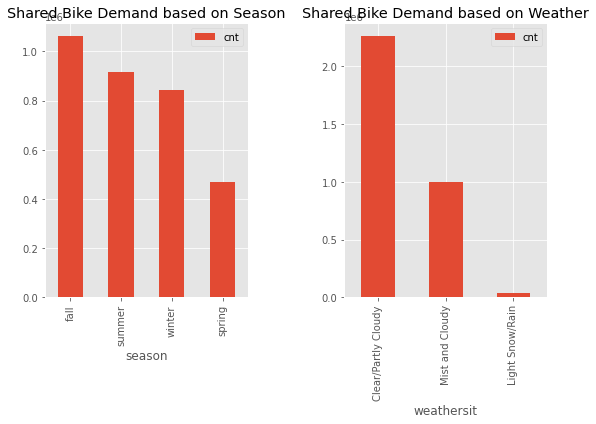

In [8]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 3, 1, title="Shared Bike Demand based on Season")
ax2 = fig.add_subplot(1, 3, 2, title="Shared Bike Demand based on Weather")

df.groupby('season').sum().sort_values('cnt', ascending=False)[['cnt']].plot.bar(ax=ax1)
df.groupby('weathersit').sum().sort_values('cnt', ascending=False)[['cnt']].plot.bar(ax=ax2)

plt.tight_layout()
plt.show()


Comment:

Riders are most likely to rent shared bikes in fall and least likely to rent shared bikes in spring

Highest demand of shared bikes is seen in Clear/Partly Cloudy weather

Light Snow/Rain results in very low bike demand and there is no bike demand in Heavy Snow/Rain

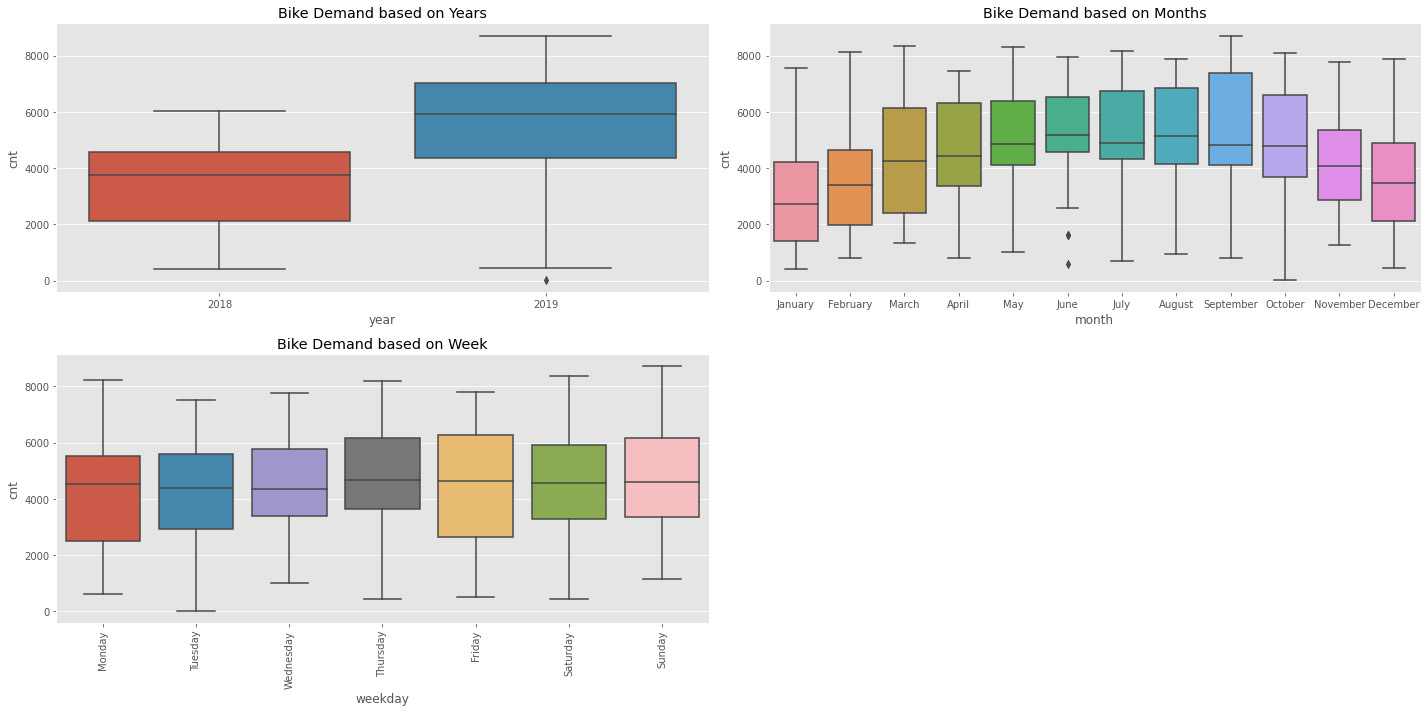

In [9]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2, 2, 1, title="Bike Demand based on Years")
ax2 = fig.add_subplot(2, 2, 2, title="Bike Demand based on Months")
ax3 = fig.add_subplot(2, 2, 3, title="Bike Demand based on Week")

sns.boxplot(df['year'], df['cnt'], ax=ax1)
sns.boxplot(df['month'], df['cnt'], ax=ax2)
sns.boxplot(df['weekday'], df['cnt'], ax=ax3)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Demand of share bikes increased a lot in 2019 from previous year.

November, December, January, February months have comparative less demands than other months.

Highest number of bike rent in a day is higher on Satuday, Sunday than weekdays

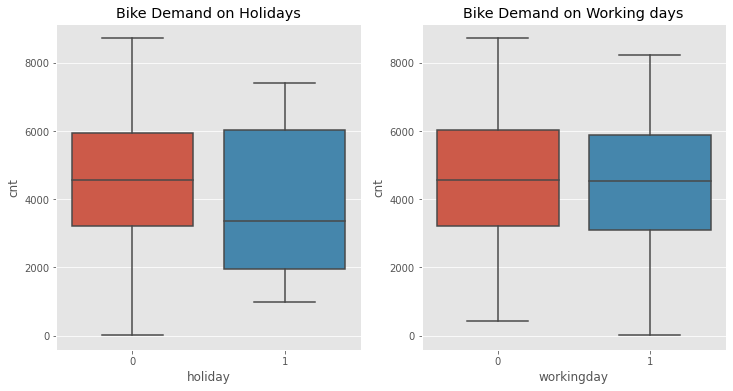

In [10]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Bike Demand on Holidays")
ax2 = fig.add_subplot(1, 2, 2, title="Bike Demand on Working days")

sns.boxplot(df['holiday'], df['cnt'], ax=ax1)
sns.boxplot(df['workingday'], df['cnt'], ax=ax2)

plt.show()


Bike demand in working day or not, working day has slightly less demand

The lowest number of bike rents is higher on holidays than that of non-holidays

The highest number of bike rents is higher on non-holidays than that of holidays

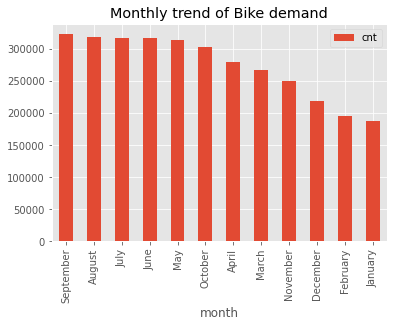

In [11]:
df.groupby('month').sum().sort_values('cnt', ascending=False)[['cnt']].plot.bar()
plt.title("Monthly trend of Bike demand")
plt.show()

Month shows very strong trend for bike demands. Dividing the months into 4 groups based of bike demand trend seen above.

group1 [July, August, Sepetember] column name : jul_aug_sep (Highest bike demand)

group2 [May, Jun, Oct] column name : may_jun_oct

group3 [March, April, November] column name: mar_apr_nov

group4 [December, February, January] (Lowest bike demand) For the last 
group, no columns will be required as 0 in the first 3 groups would signify it.

In [12]:
df["jul_aug_sep"] = df["month"].apply(lambda month : 1 if month in ["July","August","September"] else 0)
df["may_jun_oct"] = df["month"].apply(lambda month : 1 if month in ["May","June","October"] else 0)
df["mar_apr_nov"] = df["month"].apply(lambda month : 1 if month in ["March","April","November"] else 0)


In [13]:
# dropping 'month', 'year' columns as it is redundant now
df.drop(['month'], axis=1, inplace=True)
df.drop(['year'], axis=1, inplace=True)


In [14]:
df.head()

,instant,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,jul_aug_sep,may_jun_oct,mar_apr_nov
0,1,spring,0,0,Monday,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,2,spring,0,0,Tuesday,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,3,spring,0,0,Wednesday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1
3,4,spring,0,0,Thursday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1
4,5,spring,0,0,Friday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,1,0


In [14]:
def add_dummies(df, feature):
    dummy_df = pd.get_dummies(df[feature], drop_first='True')
    df.drop(feature, axis=1, inplace=True)
    print(df.columns)
    return pd.concat([df,dummy_df], axis=1)

df = add_dummies(df,'season')
df = add_dummies(df,'weekday')
df = add_dummies(df,'weathersit')

Index(['yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'date',
       'jul_aug_sep', 'may_jun_oct', 'mar_apr_nov'],
      dtype='object')
Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'date', 'jul_aug_sep',
       'may_jun_oct', 'mar_apr_nov', 'spring', 'summer', 'winter'],
      dtype='object')
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'date', 'jul_aug_sep', 'may_jun_oct',
       'mar_apr_nov', 'spring', 'summer', 'winter', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


In [15]:
df_num_var = df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]

<Figure size 432x288 with 0 Axes>

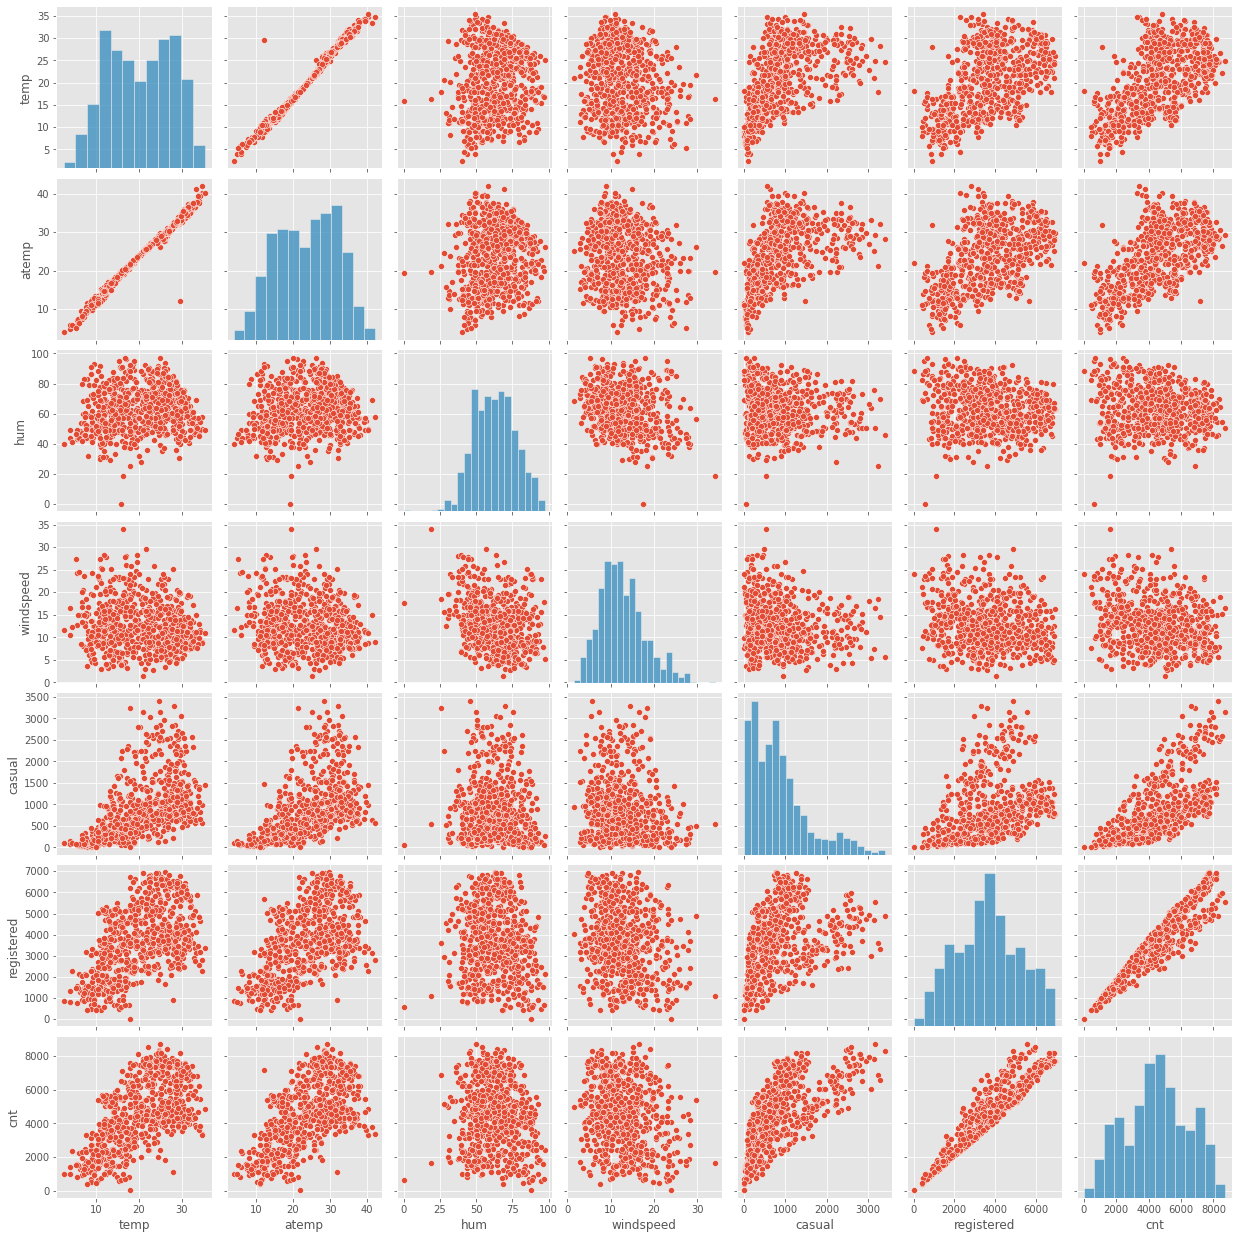

In [16]:
plt.figure()
sns.pairplot(df_num_var)
plt.show()

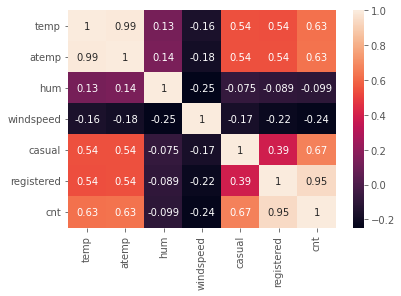

In [17]:
plt.figure()
sns.heatmap(df_num_var.corr(), annot=True)
plt.show()

temp and atemp have very high linear relationship (as seen in the pairplot), their correlation coefficient as high as 0.99

cnt, registered columns look linearly related too

In [18]:
df[~(df['casual'] + df['registered'] == df['cnt'])]


,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist and Cloudy
instant,,,,,,,,,,,,,,,,,,,,,


'cnt' is our target variable and we see that casual + registered = cnt

Hence, casual and registered are dependant variables and can be dropped

In [19]:
# spiliting the dataset
X = df.drop(['cnt', 'casual', 'registered'], axis=1)
y = df[['cnt']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
X[num_vars].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [22]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
# calculating vif factor to check colinearity
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

In [24]:
# Regressor 1 : This is the model including all features

X_train_lm = sm.add_constant(X_train)
regressor1 = sm.OLS(y_train, X_train_lm).fit()
print(regressor1.summary())
print("#############################################################")
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.03e-167
Time:                        09:11:22   Log-Likelihood:                -4151.5
No. Observations:                 511   AIC:                             8349.
Df Residuals:                     488   BIC:                             8446.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3306.7057    738.638     

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def top_n_features(n):
    top_n_feat = []
    
    lm = LinearRegression()
    lm.fit(X_train_lm, y_train)
    rfe = RFE(lm)
    rfe = rfe.fit(X_train_lm, y_train)
    
    print("Top %d features selected by RFE" %n)
    ranking = list(zip(X_train_lm.columns,rfe.support_,rfe.ranking_))
    
    for i in ranking:
        if i[1]:
            top_n_feat.append(i[0])
    print(top_n_feat)
    return top_n_feat

In [34]:
top_12_feat = top_n_features(12)



Top 12 features selected by RFE
['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Saturday', 'Sunday', 'Light Snow/Rain']


In [31]:
def build_regressor(X_train,y_train,cols):
    X_train_new = X_train[cols]
    X_train_lm = sm.add_constant(X_train_new)
    regressor = sm.OLS(y_train, X_train_lm).fit()
    print(regressor.summary())
    print("=======================================================================================================")
    calculate_vif(X_train_lm)

In [35]:
build_regressor(X_train,y_train,top_12_feat)
print("\n\n")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          4.44e-171
Time:                        09:12:45   Log-Likelihood:                -4171.2
No. Observations:                 511   AIC:                             8366.
Df Residuals:                     499   BIC:                             8417.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3614.9830    731.555     

In [36]:
top_12 = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Saturday', 'Sunday', 'Light Snow/Rain']
build_regressor(X_train,y_train,top_12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          6.23e-170
Time:                        09:12:49   Log-Likelihood:                -4171.2
No. Observations:                 511   AIC:                             8368.
Df Residuals:                     498   BIC:                             8423.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3617.8530    732.536     

Removing Sunday,atemp,WorkingDay,Saturday did not impact adjusted R-sqaured

We will remove Sunday,atemp,WorkingDay,Saturday' (Highest p-value in the latest model)

In [38]:
top_7 = ['yr', 'temp',  'hum', 'windspeed','holiday', 'spring', 'winter', 'Light Snow/Rain']
build_regressor(X_train,y_train,top_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     258.9
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          9.83e-173
Time:                        09:13:35   Log-Likelihood:                -4175.8
No. Observations:                 511   AIC:                             8370.
Df Residuals:                     502   BIC:                             8408.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3048.6736    275.686     

All the features have VIF < 7 now, which ensures there is no collinearity.

All the features have p-value < 0.05 (assumed significance level), hence all the features are important.

Hence we would build our final model with the following features top_12 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'Light Snow/Rain']

In [43]:
top_7 = ['yr', 'temp',  'hum', 'windspeed','holiday', 'spring', 'winter', 'Light Snow/Rain']
X_train_top7 = X_train[top_7]
regressor = LinearRegression()
regressor.fit(X_train_top7, y_train)

LinearRegression()

Text(0.5, 0, 'Errors')

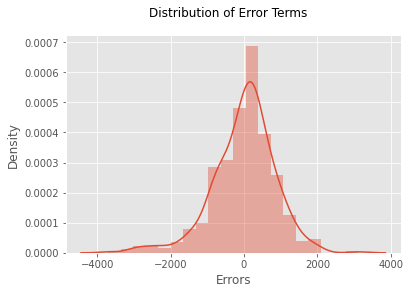

In [44]:
y_train_pred = regressor.predict(X_train_top7)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Distribution of Error Terms')
plt.xlabel('Errors')

Error terms are normally distributed around 0. Hence assumption of linear regression holds true here.

In [45]:
X_test_top7 = X_test[top_7]

y_test_pred = regressor.predict(X_test_top7)

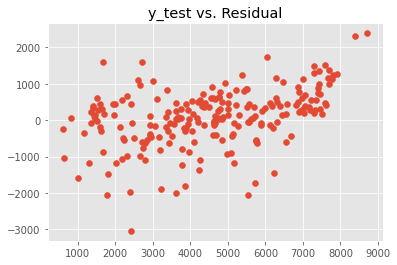

In [46]:
plt.scatter(y_test, (y_test-y_test_pred))
plt.title("y_test vs. Residual")
plt.show()

There is no visible pattern in residual with change in y_test. 
Hence we can assume residual having constant variance/homoscedastic.

In [48]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE: 791.1276518772405


In [49]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.8309447125499944


In [ ]:
#top 3 features with respect to absolute value of coefficient- temp, Light Snow/Rain, year
#(1)temp             4020.8312
#(2) yr              1985.8181
#(3)Light Snow/Rain -1695.1275

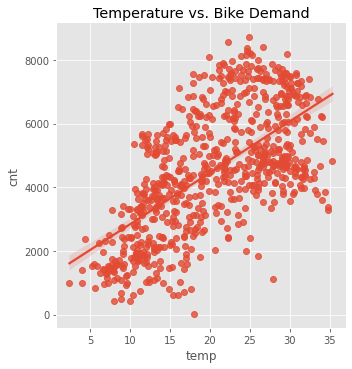

In [50]:
sns.lmplot(x="temp",y="cnt",data=df)
plt.title("Temperature vs. Bike Demand")
plt.show()


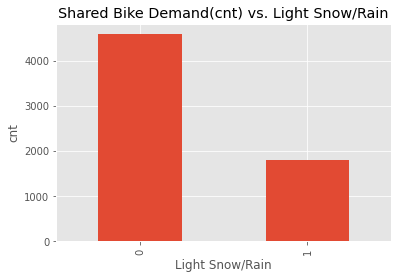

In [51]:
df.groupby("Light Snow/Rain").mean()["cnt"].plot.bar()
plt.ylabel("cnt")
plt.title("Shared Bike Demand(cnt) vs. Light Snow/Rain")
plt.show()

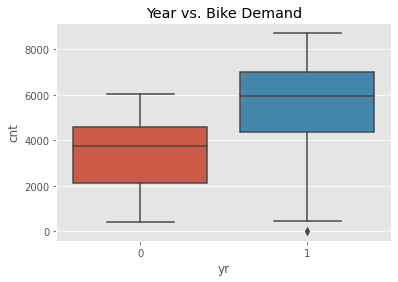

In [52]:
sns.boxplot(df['yr'], df['cnt'])
plt.title("Year vs. Bike Demand")
plt.show()

Among this 3 most important features were - temp, Light Snow/Rain, year This was decided by inspecting absolute value of their coefficient. Negative sign is coefficient means the variable is negative correlated with target varible (cnt).


The model is also validated against serveral assumptions of Linear Regression - linearity, normally distributed error, contant variance of error.


The model is evaluated by R2_score and RMSE. R2_score of 0.8309 means 83.09% of variance in the data is explained by the model. RMSE or Root Mean Squarred Error is calculated in the same unit as the target variable. RMSE of 791 means, the prediction made by this model can be over or underestimated by 791 units at maximum.
